# Evaluation of the results from shapley-multiLogReg.dml

In [1]:
import pandas as pd
import shap
import sklearn as sk
import time

In [4]:
#load prepared data into dataframe
df_x = pd.read_csv("../data/Adult_X.csv", header=None)
df_y = pd.read_csv("../data/Adult_y.csv", header=None)

In [5]:
#train model
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(df_x.values, df_y.values.ravel(), test_size=0.2, random_state=42)

model = sk.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [7]:
#test model
y_pred = model.predict(X_test)
accuracy = sk.metrics.accuracy_score(y_test, y_pred)
conf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8512206356517734
Confusion Matrix:
[[4617  325]
 [ 644  927]]


In [14]:
#create SHAP sampling explainer
sampling_explainer = shap.explainers.SamplingExplainer(model.predict, df_x.values)

#compute and measure time
start = time.time()
shap_vals_sampling=sampling_explainer.explain(df_x.iloc[1:2].values, nsamples=10000)
end = time.time()

print("The time of execution of sampling explainer is :",
      (end-start), "s")

The time of execution of sampling explainer is : 41.137680768966675 s


<Axes: >

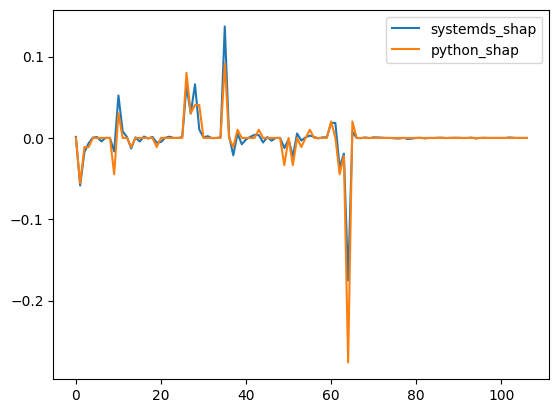

In [15]:
# load results from systemds implementation
df_comp = pd.read_csv(data_path+"/Adult_shap-values_10000smpl.csv", header=None, names=['systemds_shap'])

# add results from SHAP package
df_comp['python_shap']=shap_vals_sampling
df_comp.plot()

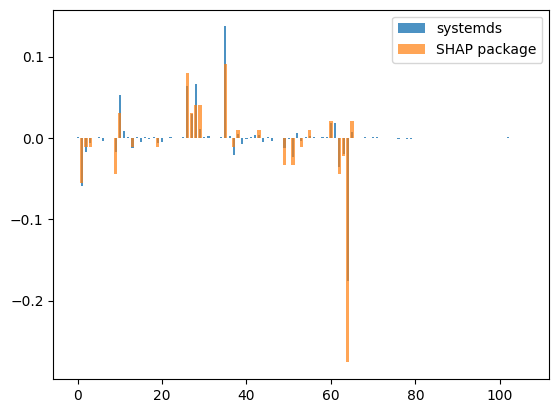

In [16]:
import matplotlib.pyplot as plt
plt.bar(range(0,len(df_comp)), df_comp.systemds_shap, label="systemds", alpha=.8, width=.5)
plt.bar(range(0,len(df_comp)), df_comp.python_shap, label="SHAP package", alpha=.7)
plt.legend()